<a href="https://colab.research.google.com/github/xyui12/Breast-cancer-prediction/blob/main/Copy_of_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Loading and expoloaring data

In [ ]:
data=pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.isna().sum()

In [ ]:
#Drop column with Null values
data.dropna(axis=1,inplace=True)

In [ ]:

#counting rows and columns
data.shape

(569, 32)

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Label enconding

In [ ]:
data.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#labelencoder.fit_transform(data.iloc[:,1].values)
data.iloc[:,1]=labelencoder.fit_transform(data.iloc[:,1].values)


<ipython-input-10-91cb6e7a4ef9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,1]=labelencoder.fit_transform(data.iloc[:,1].values)


In [ ]:

data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


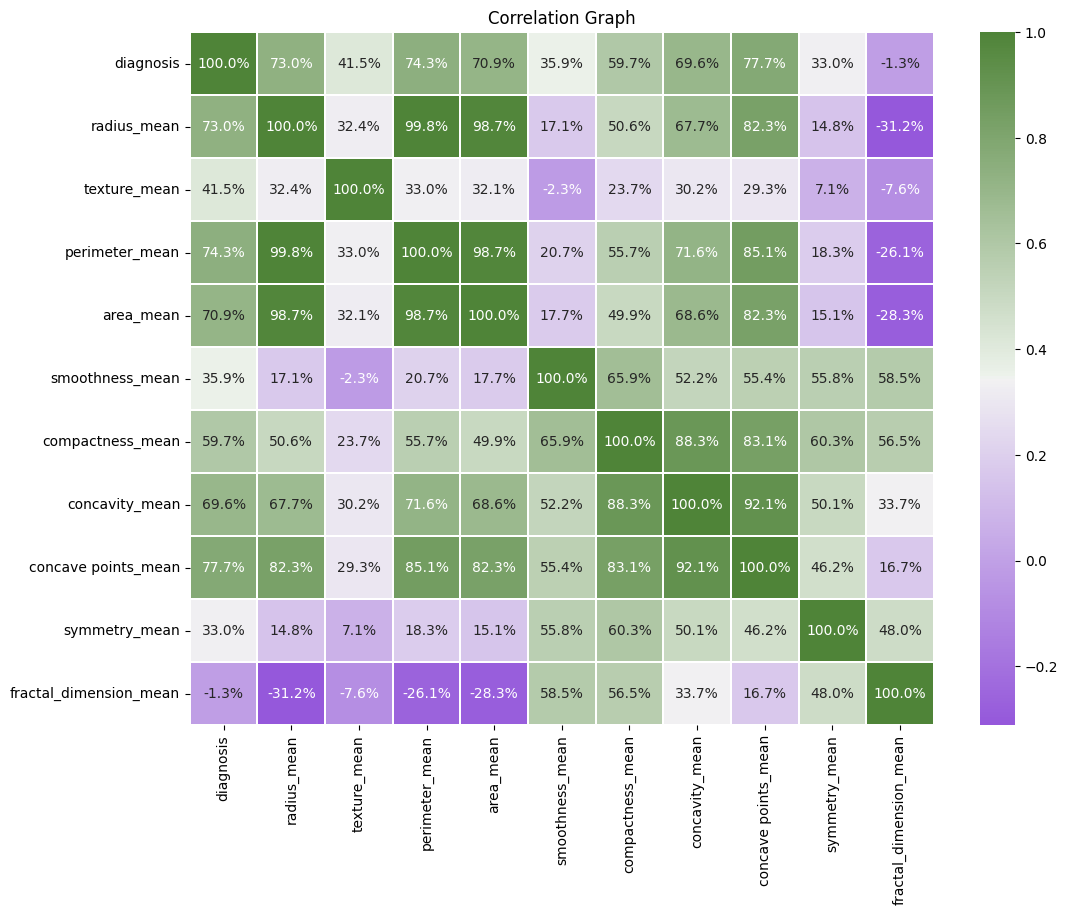

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Correlation Graph")
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

Standard Scaler for standrizer the Data

In [ ]:
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [ ]:
x.shape

(569, 31)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled.shape

(569, 31)

In [ ]:


x_scaled[:2].mean()

0.833016025701697

In [ ]:

x_scaled[:2].std()

1.258133357936373

spilting data

In [ ]:
x=data.iloc[:,2:].values
y=data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x_sc=sc.fit_transform(train_x)
test_x_sc=sc.fit_transform(test_x)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions=classifier.predict(test_x)

In [ ]:
pd.DataFrame(train_x_sc).describe()
pd.DataFrame(test_x_sc).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,5.061996e-16,1.819834e-15,4.906720e-16,2.282556e-16,-2.608636e-16,1.037243e-15,-5.434658e-16,-3.571347e-16,-8.936131e-16,2.614847e-15,...,-1.239102e-15,1.552759e-16,4.766972e-16,-7.546411e-16,2.614847e-15,6.738976e-16,1.211152e-16,-2.919188e-16,-9.906605e-16,1.099354e-15
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00
min,-1.753874e+00,-1.832653e+00,-1.760864e+00,-1.278396e+00,-2.286651e+00,-1.476311e+00,-1.156866e+00,-1.312735e+00,-2.815667e+00,-1.773819e+00,...,-1.498854e+00,-1.904128e+00,-1.522302e+00,-1.098341e+00,-2.035672e+00,-1.495808e+00,-1.387342e+00,-1.889206e+00,-2.111287e+00,-1.692010e+00
25%,-6.252610e-01,-6.830387e-01,-6.361638e-01,-6.107317e-01,-6.785441e-01,-7.479722e-01,-7.424630e-01,-7.234507e-01,-7.352846e-01,-6.317666e-01,...,-6.458038e-01,-6.788173e-01,-6.641832e-01,-6.126994e-01,-6.684908e-01,-6.715361e-01,-7.108171e-01,-7.933703e-01,-6.358662e-01,-6.370028e-01
50%,-1.818382e-01,-1.582391e-01,-2.123378e-01,-2.706560e-01,-6.031079e-02,-5.398948e-02,-3.257163e-01,-3.597846e-01,-1.428553e-02,-1.845855e-01,...,-2.664850e-01,-9.597468e-02,-2.531566e-01,-3.150927e-01,8.680232e-03,-1.136367e-01,-1.870561e-01,-5.340942e-02,-6.890310e-02,-1.733226e-01
75%,4.089375e-01,4.216251e-01,4.077885e-01,2.656275e-01,5.954019e-01,4.762534e-01,5.678587e-01,7.410286e-01,5.884246e-01,3.971515e-01,...,4.692266e-01,6.068650e-01,5.177657e-01,2.650014e-01,4.787653e-01,5.422815e-01,5.851361e-01,6.864720e-01,5.054659e-01,4.202789e-01
max,3.807603e+00,3.300719e+00,3.828626e+00,4.886008e+00,3.243472e+00,3.542527e+00,4.108602e+00,3.816575e+00,3.504340e+00,4.545626e+00,...,3.514197e+00,3.618716e+00,3.716500e+00,4.434971e+00,3.669960e+00,4.266646e+00,4.966813e+00,2.491274e+00,6.237635e+00,5.015005e+00


In [ ]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [ ]:
p.fit(train_x_sc,train_y)

Perceptron()

In [ ]:
test_predict = p.predict(test_x_sc)
train_predict = p.predict(train_x_sc)

In [ ]:



from sklearn.metrics import accuracy_score
print("accuracy of training data is:",accuracy_score(train_y,train_predict))
print("accuracy of testing data is:",accuracy_score(test_y,test_predict))

accuracy of training data is: 0.9765258215962441
accuracy of testing data is: 0.958041958041958


In [ ]:
p1=Perceptron(penalty="elasticnet")
p1.fit(train_x_sc,train_y)

Perceptron(penalty='elasticnet')

In [ ]:
train_predict_en =p1.predict(train_x_sc)
test_predict_en=p1.predict(test_x_sc)

In [ ]:

print("accuracy of trianing data is :",accuracy_score(train_y,train_predict_en))
print("accuracy of testing data is :",accuracy_score(test_y,test_predict_en))

accuracy of trianing data is : 0.9835680751173709
accuracy of testing data is : 0.972027972027972


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()
svc.fit(train_x_sc,train_y)
train_x_sc_svc=svc.predict(train_x_sc)
test_x_sc_svc=svc.predict(test_x_sc)
print("accuracy of trianing data is :",accuracy_score(train_y,train_x_sc_svc))
print("accuracy of testing data is :",accuracy_score(test_y,test_x_sc_svc))

accuracy of trianing data is : 0.9882629107981221
accuracy of testing data is : 0.972027972027972


K Forset Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(train_x,train_y)

RandomForestClassifier(n_estimators=20)

In [ ]:

model.score(test_x,test_y)

0.9440559440559441

Decision Tree

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(test_x,test_y)

DecisionTreeClassifier()

In [ ]:
model.score(test_x,test_y)

1.0

In [ ]:
model.score(train_x,train_y)

0.9483568075117371


HyperTunning the ML Model

In [ ]:
from  sklearn.model_selection import GridSearchCV

In [ ]:
model = DecisionTreeClassifier()
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
gsc = GridSearchCV(model, param_grid, cv=10)

gsc.fit(train_x, train_y)
print(" Best Score is ")
print(gsc.best_score_)

print("Best Estinator is ")
print(gsc.best_estimator_)
print(" Best Parametes are")
print(gsc.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn

 Best Score is 
0.9485603543743079
Best Estinator is 
DecisionTreeClassifier(max_features='auto', min_samples_leaf=4,
                       min_samples_split=9)
 Best Parametes are
{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 9}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



**Performance** **Evaluation**

[[88  2]
 [ 3 50]]


<Axes: >

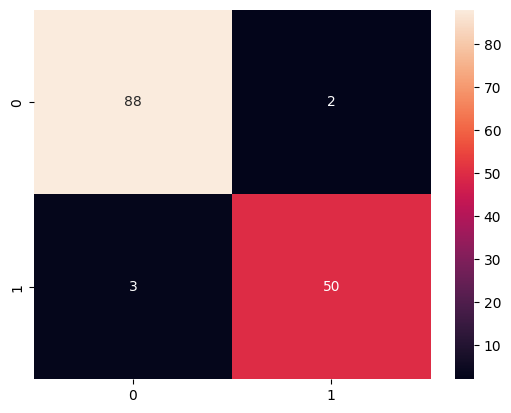

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(test_y,predictions)
print(cm)
sns.heatmap(cm,annot=True)

Checking Model accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,predictions))

0.965034965034965


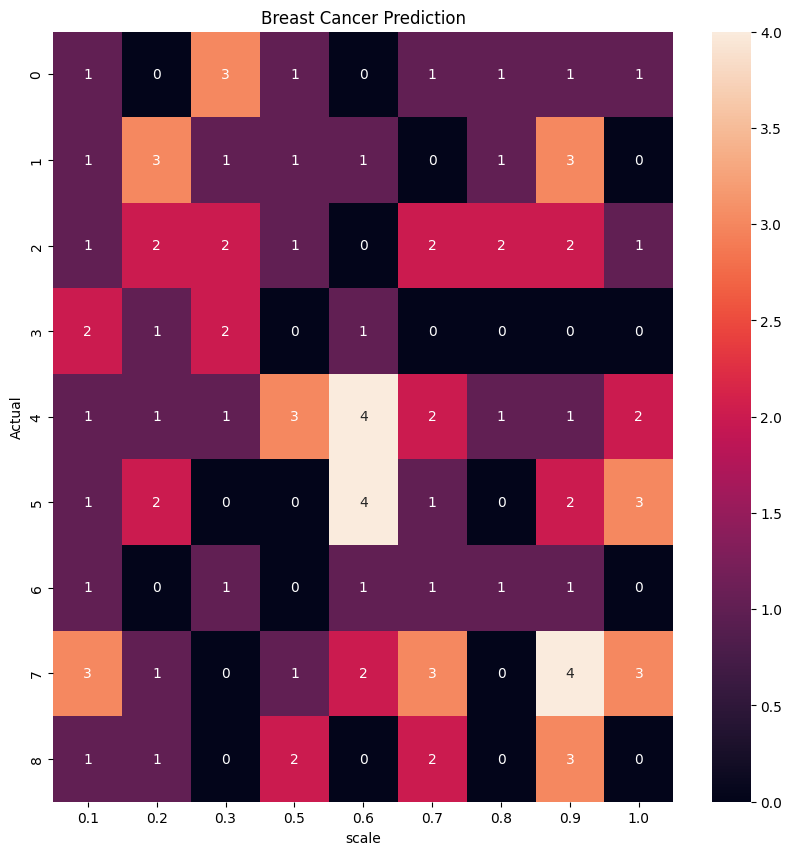

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define your bins
bins = np.array([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Y_test = np.random.choice(len(bins), size=100)
classifier_predictions = np.random.choice(len(bins), size=100)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, classifier_predictions)
for row in cm:
  for value in row:
    if value > len(bins):
      bins[-1] = value
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=bins)
plt.xlabel('scale')
plt.ylabel('Actual')
plt.title('Breast Cancer Prediction')
plt.show()


In [ ]:
###check the data  is standrizer or not